Team Members: Dane Pastor, Leanne Mangenni

Github Link: https://github.com/Dpastor1/DSCI-235-Final-

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
#This was used to read in the data on google colab.

Mounted at /content/drive


In [ ]:
videoGames = pd.read_csv('/content/drive/MyDrive/vgsales.csv') #Please replace with the data set
oldestGame = videoGames.loc[videoGames["Year"].idxmin()]
newestGame = videoGames.loc[videoGames["Year"].idxmax()]
print(oldestGame)
print(newestGame)

videoGames.head()


Rank                  259
Name            Asteroids
Platform             2600
Year               1980.0
Genre             Shooter
Publisher           Atari
NA_Sales              4.0
EU_Sales             0.26
JP_Sales              0.0
Other_Sales          0.05
Global_Sales         4.31
Name: 258, dtype: object
Rank                              5959
Name            Imagine: Makeup Artist
Platform                            DS
Year                            2020.0
Genre                       Simulation
Publisher                      Ubisoft
NA_Sales                          0.27
EU_Sales                           0.0
JP_Sales                           0.0
Other_Sales                       0.02
Global_Sales                      0.29
Name: 5957, dtype: object


,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


$\qquad$Here we have setup our dataframe from a CSV file containing information on videogame titles and their sales, console platform, publisher, and release year. We have also extracted some important information about our dataset. The oldest game came out in 1980, while the newest one came out in 2020.

###Data Wrangling

Let's try to find some trends behind videogame genre popularity over time.

In [ ]:
genreSales = videoGames.groupby(["Genre", "Year"]) .Global_Sales.sum()
genreSales




Genre     Year  
Action    1980.0     0.34
          1981.0    14.84
          1982.0     6.52
          1983.0     2.86
          1984.0     1.85
                    ...  
Strategy  2012.0     3.33
          2013.0     6.33
          2014.0     0.99
          2015.0     1.82
          2016.0     0.50
Name: Global_Sales, Length: 389, dtype: float64

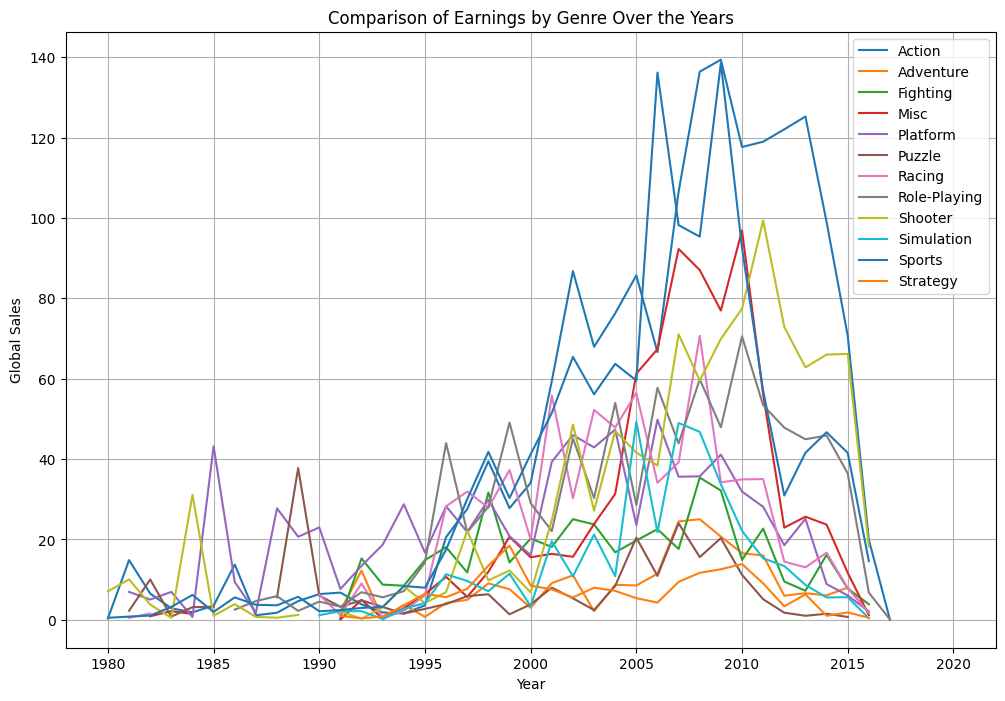

In [ ]:
data_unstacked = genreSales.unstack(level=0)

# Plotting the data
plt.figure(figsize=(12, 8))

# Plotting each genre
for genre in data_unstacked.columns:
    plt.plot(data_unstacked.index, data_unstacked[genre], label=genre)

# Adding labels and title
plt.xlabel('Year')
plt.ylabel('Global Sales')
plt.title('Comparison of Earnings by Genre Over the Years')
plt.legend()
plt.grid(True)

# Displaying the plot
plt.show()



This graph is really messy because there are 12 different lines on one graph. Lets reduce this down by making 4 seperate graphs to represent this information.

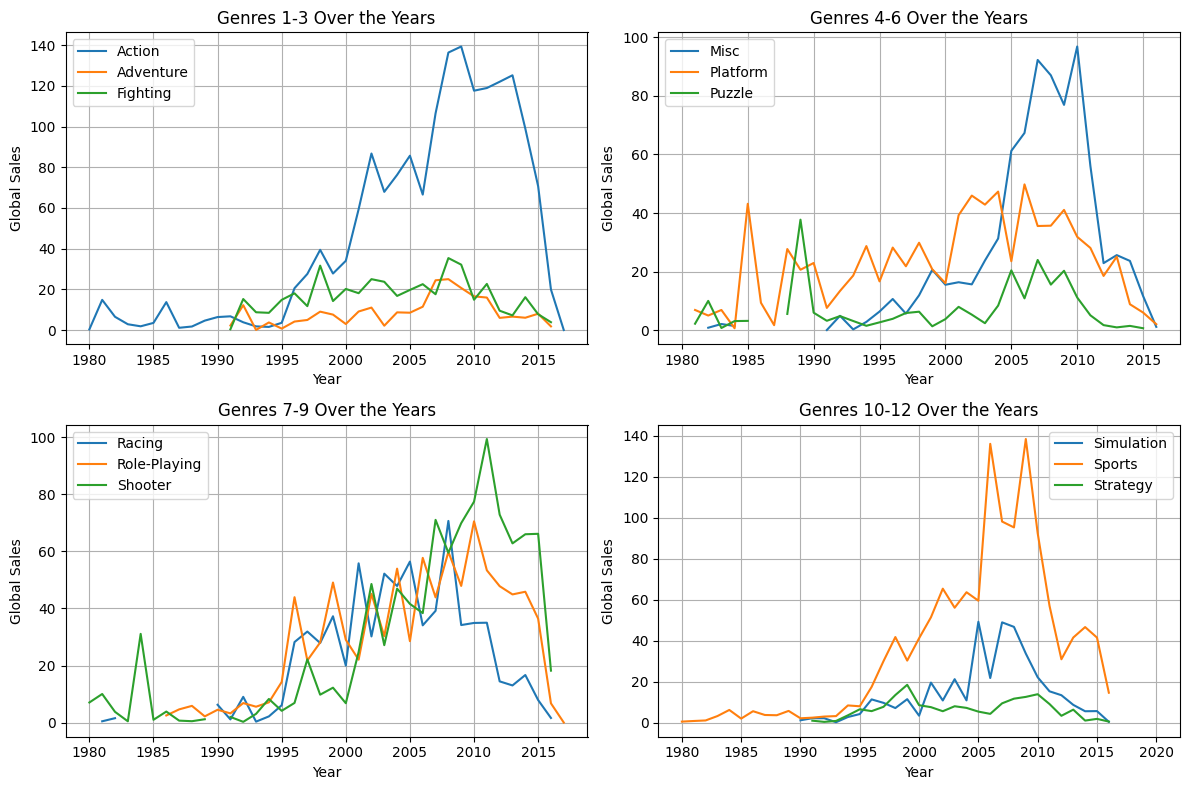

In [ ]:

all_genres = data_unstacked.columns
num_genres = len(all_genres)
genres_per_plot = num_genres // 4

fig, axs = plt.subplots(2, 2, figsize=(12, 8))
for i in range(4):
    start = i * genres_per_plot
    end = start + genres_per_plot
    selected_genres = all_genres[start:end]

    ax = axs[i // 2, i % 2]
    for genre in selected_genres:
        ax.plot(data_unstacked.index, data_unstacked[genre], label=genre)

    ax.set_xlabel('Year')
    ax.set_ylabel('Global Sales')
    ax.set_title(f'Genres {start + 1}-{end} Over the Years')
    ax.legend()
    ax.grid(True)

plt.tight_layout()
plt.show()

$\qquad$Now it is easier to see which genre is which. This graph shows us a general increase in videogame sales from around the year 2000 to the year 2010. These graphs show an extreme falling off of videogame popularity right around 2015. Lets investigate if videogame sales fell of at this time or if our data set is biased.

# of videogames recorded in 1980: Rank                                                        29826
Name            AsteroidsMissile CommandKaboom!DefenderBoxingI...
Platform                     260026002600260026002600260026002600
Year                                                      17820.0
Genre           ShooterShooterMiscMiscFightingSportsActionMisc...
Publisher       AtariAtariActivisionAtariActivisionActivisionA...
NA_Sales                                                    10.59
EU_Sales                                                     0.67
JP_Sales                                                      0.0
Other_Sales                                                  0.12
Global_Sales                                                11.38
dtype: object
# of videogames recorded in 1990: Rank            16
Name            16
Platform        16
Year            16
Genre           16
Publisher       16
NA_Sales        16
EU_Sales        16
JP_Sales        16
Other_Sales     16
Gl

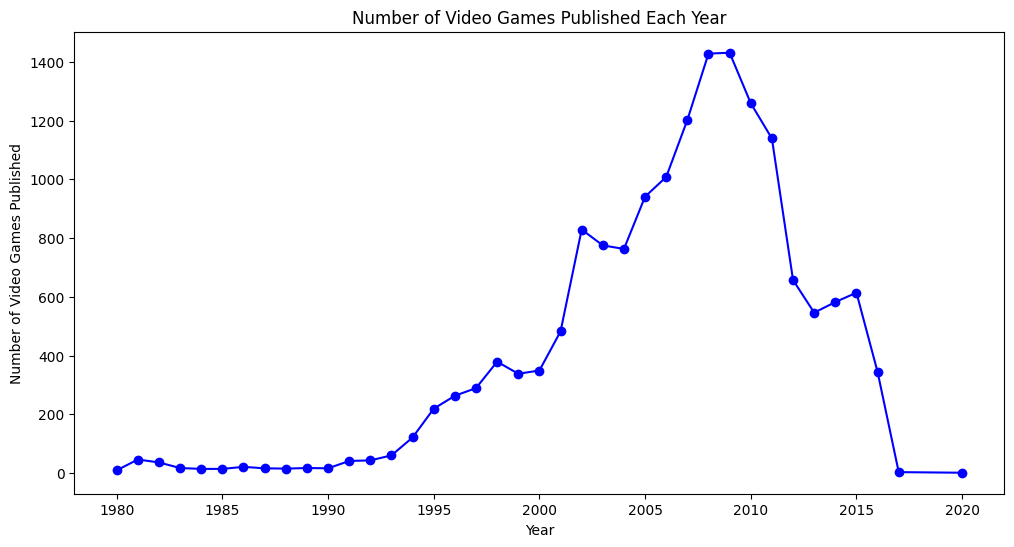

In [ ]:

print("# of videogames recorded in 1980:", videoGames[videoGames["Year"] == 1980].sum())
print("# of videogames recorded in 1990:", videoGames[videoGames["Year"] == 1990].count())
print("# of videogames recorded in 2000:", videoGames[videoGames["Year"] == 2000].count())
print("# of videogames recorded in 2010:", videoGames[videoGames["Year"] == 2010].count())
print("# of videogames recorded in 2020:", videoGames[videoGames["Year"] == 2020].count())

games_per_year = videoGames.groupby("Year")["Name"].count()
plt.figure(figsize=(12, 6))
plt.plot(games_per_year.index, games_per_year.values, marker='o', linestyle='-', color='b')

plt.xlabel('Year')
plt.ylabel('Number of Video Games Published')
plt.title('Number of Video Games Published Each Year')
plt.show()

This shows that there has been a clear spike in videogame publishes between the years 2000 and 2010 and that data after 2015 should not be considered.

###Lets investigate why Videogame sales increased so dramatically during the period between the years 2000 and 2010

To start, lets look at the consoles that were getting the most titles and sales between 2000 and 2010.

In [ ]:
timePeriod = videoGames[(videoGames["Year"] <= 2010) & (videoGames["Year"] >= 2000)]
timePeriod_grouped = timePeriod.groupby(["Platform"]).size().reset_index(name='Count')
print(timePeriod_grouped)

timePeriod_grouped = timePeriod.groupby(["Platform"])["Global_Sales"].sum().reset_index(name='TotalSales')
print(timePeriod_grouped)

   Platform  Count
0        DC     31
1        DS   1943
2        GB     27
3       GBA    811
4        GC    542
5       N64     70
6        PC    532
7        PS    273
8       PS2   2120
9       PS3    599
10      PSP    885
11       WS      4
12      Wii   1092
13     X360    735
14       XB    803
   Platform  TotalSales
0        DC        7.41
1        DS      777.23
2        GB       29.00
3       GBA      313.56
4        GC      197.14
5       N64       37.35
6        PC      109.34
7        PS      140.54
8       PS2     1232.99
9       PS3      491.33
10      PSP      262.55
11       WS        0.96
12      Wii      809.28
13     X360      583.70
14       XB      252.09


$\qquad$ This shows that the consoles that were driving the market were the DS, GBA, PS2, PSP, Xbox 360, and the Wii. Intuitively, these consoles that had the most sales also had the most amount of games. Interestingly, 3 of the 6 top performing consoles during this time were created by Nintendo. Let's look at why these consoles dominated the market at this time.

$\qquad$ Evidence appears to show that one of the big reasons why video games became much more popular in this time frame is because of huge leaps in not just hardware advancements, but rather accessibility to the consoles of the time. For example, The Guardian in their article "Nintendo DS: from ugly duckling to gaming phenomenon" describes that the DS, the console with the highest amount of games and second highest global sales in this period should have not beaten out the Play Station Pro or PSP for short in popularity. The article explains that the PSP "was sleek with a gorgeous widescreen display"(Howson, 1) and had better performance overall. The key reason why Nintendo's portable console outsold Sony's portable console was because of user accessibility. People who did not play video games before were not scared to use the DS because Nintendo's games were intuitive simple, and could be enjoyed by a casual audience. This is why we see so many of the top-performing consoles on this list created by Nintendo. As shown below, the game with the most sales of all time is "WII Sports" which is the pinnacle of beginner friendliness and intuitivity. This game pioneered motion controls and had a simple concept. You play sports that everybody knows how they work on a fundamental level with very easy to pick up motion controls. A 5-year-old could pick up the game just as easily as someone who had played video games for 20 years before because the game operated on physical motion. Everybody knows the general motion of how to swing a golf club, hit a tennis ball, or throw a bowling ball, which are the main mechanics of the game.

$\qquad$ Intuitively we see that as video games become more accessible, more people begin playing video games and sales show a significant increase. This certainly has some hardware implications as portable and motion-capture technology could not be so easily achieved before the turn of the century. Computers could not both fit in a person's two hands and also have the performance to create a fun gaming experience like the DS or PSP. They certainly could not support tracking within a 3-dimensional space to create motion capture consoles like the WII or the Xbox Kinect. We have Moor's law to thank for the ability for our hardware to become more powerful and take up less space, allowing these consoles to set the stage for gaming in the 21st century.

In [ ]:
print("Highest sales of any videogame:", videoGames.loc[videoGames["Global_Sales"].idxmax()])

Highest sales of any videogame: Rank                     1
Name            Wii Sports
Platform               Wii
Year                2006.0
Genre               Sports
Publisher         Nintendo
NA_Sales             41.49
EU_Sales             29.02
JP_Sales              3.77
Other_Sales           8.46
Global_Sales         82.74
Name: 0, dtype: object


#Now we will look at the rise of the 3 highest earning genres and why they became such staple genres.

### If you recall from the graph above showing the popularity of genres over time you may have noticed that there are 4 genres that stuck out above the rest. Although just about every single genre had a big sales increase between the period of 2000 and 2010, Sports, Action, Misc, and Shooter games saw the biggest increase. Let's investigate why these genres in particular became so popular.

###Let's start with Sports and work our way down.

<BarContainer object of 10 artists>

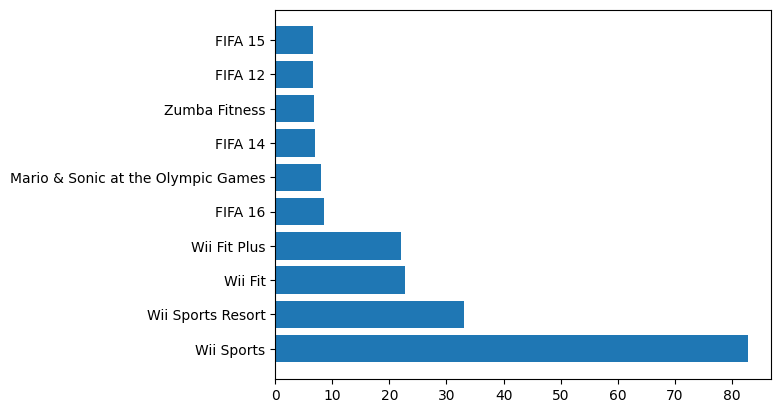

In [ ]:
sport_data = videoGames.loc[videoGames["Genre"] == "Sports"]
#sport_data.groupby(["Name", "Global_Sales"])

#Plots the top 10 grossing sports games
names = sport_data["Name"][0:10]
values = sport_data["Global_Sales"][0:10]
plt.barh(names, values)
#plt.xticks(rotation=90);


$\qquad$Unsurprisingly, the sports category is carried by WII sports with the original game as "Wii Sports has over double the sales of the second highest sold game for the category, which is the game's sequel. The highest-selling non-Wii games only made about an 8th of the sales that Wii Sports made. For reasons that we have gone over previously, it is no wonder why the sports genre became so popular, however the genre was carried exclusively by the Wii Sports games. Below is the graph we saw previously of genre popularity, but without the Wii games in the sports category.

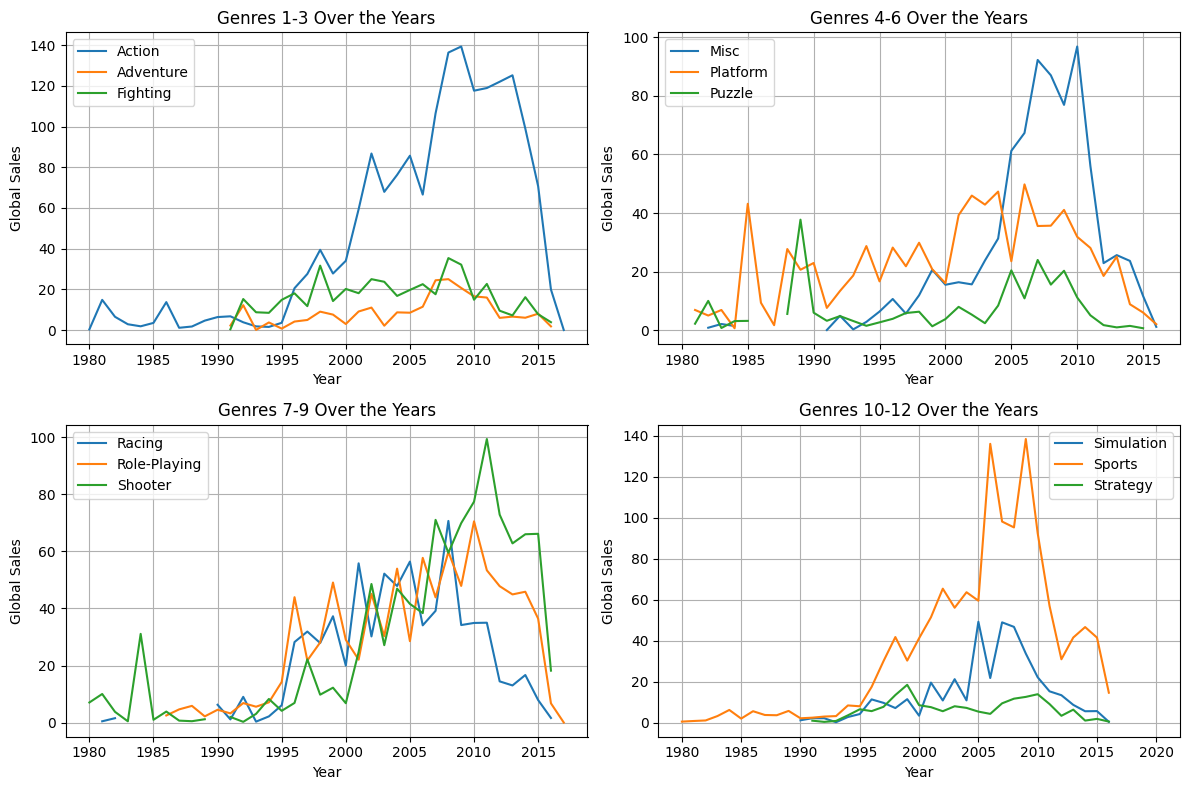

In [ ]:
all_genres = data_unstacked.columns
num_genres = len(all_genres)
genres_per_plot = num_genres // 4

fig, axs = plt.subplots(2, 2, figsize=(12, 8))
for i in range(4):
    start = i * genres_per_plot
    end = start + genres_per_plot
    selected_genres = all_genres[start:end]

    ax = axs[i // 2, i % 2]
    for genre in selected_genres:
        if (genre == "Sports"):
          ax.plot(data_unstacked.index, data_unstacked[genre][5:], label=genre)
          #print(videoGames[videoGames["Genre"] == "Sports"][5:])
        else:
          ax.plot(data_unstacked.index, data_unstacked[genre], label=genre)

    ax.set_xlabel('Year')
    ax.set_ylabel('Global Sales')
    ax.set_title(f'Genres {start + 1}-{end} Over the Years')
    ax.legend()
    ax.grid(True)

plt.tight_layout()
plt.show()
#Finish Working on this. Currently doesn't work

Some Analysis.

### Next Let's look at Action

Text(0.5, 1.0, 'Sales of Top Action Games in the World')

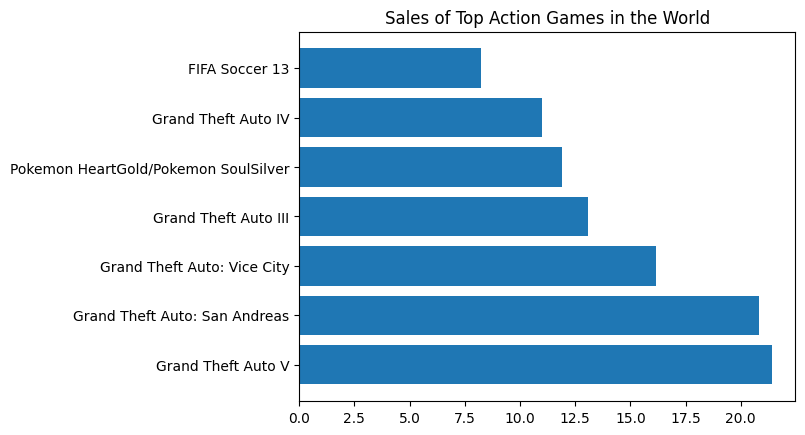

In [ ]:
Action_data = videoGames.loc[videoGames["Genre"] == "Action"]

top_action_games = Action_data.sort_values(by="Global_Sales", ascending=False).head(10)

names = top_action_games["Name"]
values = top_action_games["Global_Sales"]
plt.barh(names, values)
plt.title("Sales of Top Action Games in the World")

Text(0.5, 1.0, 'Sales of Top Action Games in Japan')

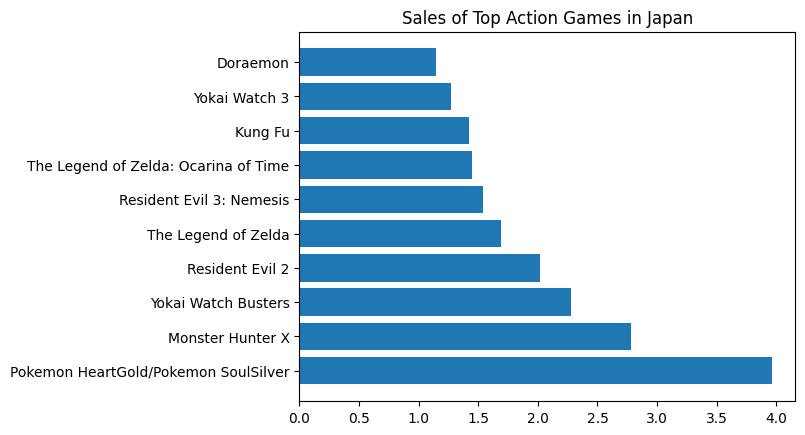

In [ ]:
Action_data = videoGames.loc[videoGames["Genre"] == "Action"]

top_action_games = Action_data.sort_values(by="JP_Sales", ascending=False).head(10)

names = top_action_games["Name"]
values = top_action_games["JP_Sales"]
plt.barh(names, values)
plt.title("Sales of Top Action Games in Japan")

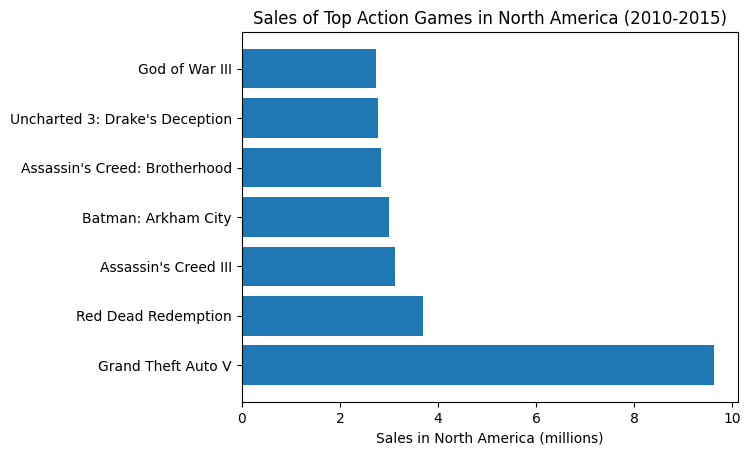

In [ ]:
Action_data = videoGames.loc[videoGames["Genre"] == "Action"]

top_action_games = Action_data.sort_values(by="NA_Sales", ascending=False).head(10)

names = top_action_games["Name"]4
values = top_action_games["NA_Sales"]
plt.barh(names, values)
plt.title("Sales of Top Action Games in North America")

$\qquad$Interestingly, this genre did not have a clear worldwide winner like the sports category. There was a big divide between the US and Japan in the games that sold the most copies. In North America, the leaders for this genre came from the "Grand Theft Auto" titles as 5 of the top 7 games were of these, whereas Japan did not have a single Grand Theft Auto title make their top ten. Let's analyze what made these different titles the same in their ability to rise above the genres that never gained the traction that this one did. We're specifically going to talk about the games not published by Nintendo like "Pokemon" and "The Legend of Zelda" titles because they have very similar answers to what we have discussed before. Nintendo's entire image is making games that are accessible and fun to a casual audience.

$\qquad$On the other hand, "Grand Theft Auto", or GTA is a series that does not appeal to a wide audience. It's a game series that contains strong language, blood, sex, and murder. Similarly, the "Resident Evil" games are survival horror games that are particularly gorey, containing the same strong language, murder, and blood. If video games at the time were growing in popularity by appealing to the largest possible audience, shouldn't these titles have ultimately failed to compete?

$\qquad$The answer is a resounding no. Although these titles did not go for an audience as wide as Nintendo games, they were able to find success because of their overall quality and polish. Both Grand Theft Auto 5 and Resident Evil 2 are considered masterpieces because of their story. Den of Geek in their article "Why GTA 5 Is Still Rockstar's Masterpiece" describes that one of the main reasons why the studio that produced the GTA games, Rockstar, had so much success with GTA 5 was because they wrote a very powerful storyline into the game that added onto the best parts of their previous games' stories. Similarly, the Resident Evil games are crowned as some of the best story-based games of all time. As someone who has played all of the Resident Evil games, I can confirm that the enthralling character stories and interesting settings provide a unique experience that is not often achieved by games.

$\qquad$Additionally, both of these games looked visually stunning for their times. They both feature large, wide-open areas and look good even by videogame standards for today, let alone games released in the 2010s. This is because both of these games utilized newly developed postprocessing techniques. More specifically, both of these titles utilize Fast Approximate Anti-Aliasing or FXAA which was created by Timothy Lottes, an employee at Nvidia. This technological advancement was huge for video game graphics because it allowed games to look much better without using a whole lot more resources by adding extra pixels to smooth out rough edges on screen. With huge increases in the quality of videogame graphics, people could be entranced in a story much easier as graphics began to look more and more like real life.

###Finally we are going to look at shooter games

This genre did not see the same initial jump in sales right at the year 2000, but rather grew gradually and became one of the biggest genres between 2010 and 2015.

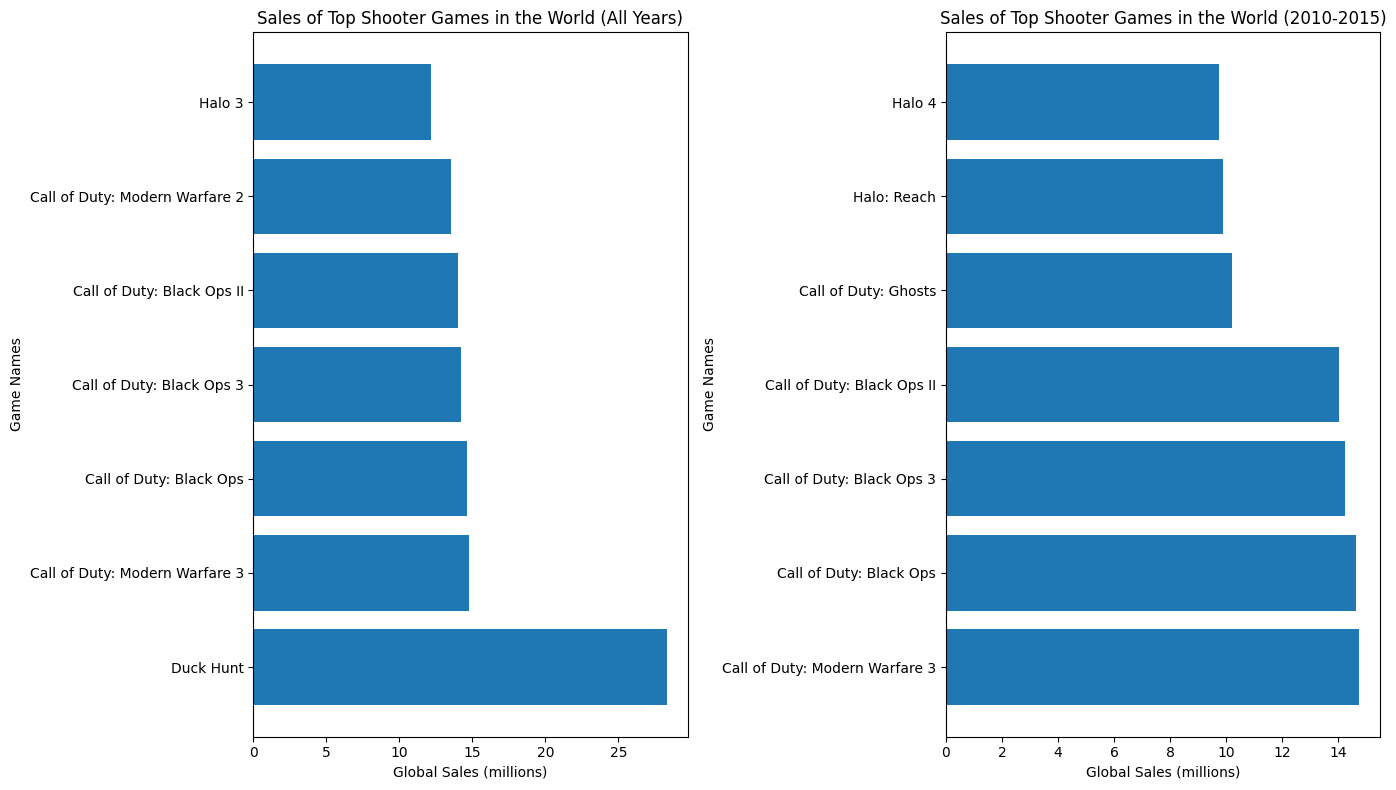

In [ ]:
shooter_data = videoGames.loc[videoGames["Genre"] == "Shooter"]
top_shooters = shooter_data.sort_values(by="Global_Sales", ascending=False).head(10)
names_original = top_shooters["Name"]
values_original = top_shooters["Global_Sales"]

filtered_shooter_data = videoGames.loc[(videoGames["Genre"] == "Shooter") & (videoGames["Year"] >= 2010) & (videoGames["Year"] <= 2015)]
top_filtered_shooters = filtered_shooter_data.sort_values(by="Global_Sales", ascending=False).head(10)
names_filtered = top_filtered_shooters["Name"]
values_filtered = top_filtered_shooters["Global_Sales"]
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 8))

ax1.barh(names_original, values_original)
ax1.set_title("Sales of Top Shooter Games in the World (All Years)")
ax1.set_xlabel("Global Sales (millions)")
ax1.set_ylabel("Game Names")

ax2.barh(names_filtered, values_filtered)
ax2.set_title("Sales of Top Shooter Games in the World (2010-2015)")
ax2.set_xlabel("Global Sales (millions)")
ax2.set_ylabel("Game Names")



plt.tight_layout()
plt.show()


In [ ]:
videoGames.loc[videoGames["Name"] == "Duck Hunt"]
#videoGames.loc[videoGames["Name"] == "Counter Strike Global Offensive"]


,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
9,10,Duck Hunt,NES,1984.0,Shooter,Nintendo,26.93,0.63,0.28,0.47,28.31


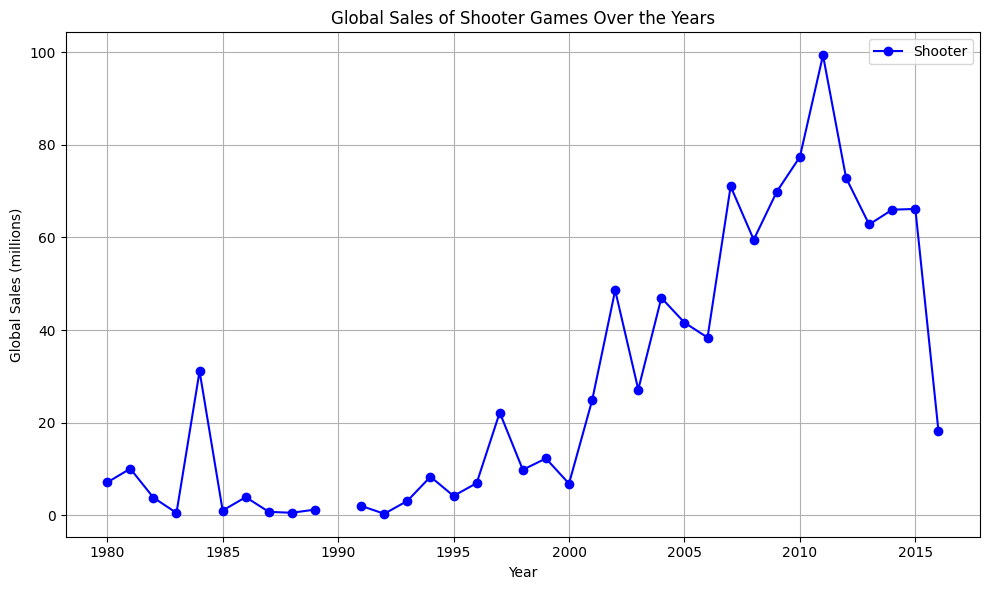

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(data_unstacked.index, data_unstacked["Shooter"], label="Shooter", color='b', marker='o')  # Using blue color and circle markers for visualization
plt.xlabel('Year')
plt.ylabel('Global Sales (millions)')
plt.title('Global Sales of Shooter Games Over the Years')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

$\qquad$Unexpectedly to me, Duck Hunt, a single-player game released in 1984 destroys the competition from modern multiplayer shooters like the Call of Duty franchise. This is the reason we see a giant leap in the shooter category in the year 1984, and then a gradual fall off until the genre evolved and gained gradual traction.

$\qquad$So why did multiplayer shooters like Call of Duty and Halo overtake the market for the shooter games and why did they take so long to gain popularity compared to the other genres? Multiplayer shooters are very popular because of their ability to allow a player to play with and against other people at any time of day and their competitive nature. the rise of Esports grew alongside multiplayer shooters like Counter Strike Global Offensive and Overwatch, which allowed players to make a living off of video games. People have dedicated tens of thousands of hours to these games to try to be the best.

$\qquad$We likely saw a gradual increase in popularity for this genre rather than an instant one because this genre has relied heavily on increases in technological capabilities to thrive. 20 years ago, it would not have been possible to create a competitive multiplayer shooter because internet connections and shooters' NewNewnetcode would not be able to provide a fun, consistent, and fair experience to the players. These players value consistency within their games so if the game is laggy and unresponsive because in-game actions couldn't be processed in milliseconds, they are going to have an overall unplayable experience. This reason is why I believe the behavior in the graph reflects a slow growth throughout the years as new technology enhanced and grew the ability for competition to exist in online gaming.

#Works Cited

$\qquad$Atwood, J. (2011, December 7). Fast Approximate Anti-Aliasing (FXAA). Coding Horror. https://web.archive.org/web/20140131025653/http://www.codinghorror.com/blog/2011/12/fast-approximate-anti-aliasing-fxaa.html

$\qquad$Byrd, M. (2021, April 8). Why GTA 5 is still Rockstar’s masterpiece. Den of Geek. https://www.denofgeek.com/games/gta-5-best-rockstar-game-retrospective/
Contributor, A. (2022, December 13). A decade of game development and innovation: Major milestones from 2000 to 2010. Academy of Art University. https://blog.academyart.edu/a-decade-of-game-development-major-milestones-from-2000-to-2010/

$\qquad$Howson, G. (2009, December 16). Nintendo DS: From ugly duckling to gaming phenomenon. The Guardian. https://www.theguardian.com/technology/2009/dec/16/nintendo-ds-gaming-phenomenon

$\qquad$Lottes, T. (2009, February). FXAA. Nvidia. https://developer.download.nvidia.com/assets/gamedev/files/sdk/11/FXAA_WhitePaper.pdf

$\qquad$Unknown, A. (2017, February 21). Why grand theft auto is the most popular game franchise in the Western World. NewZoo. https://newzoo.com/resources/blog/grand-theft-auto-popular-game-franchise-western-world

$\qquad$Unknown, A. (2021, May 13). History of gaming setups - 80’s, 90’s & 00’s. Hosa. https://hosatech.com/press-release/history-of-video-games/